Loading required package: gplots

Attaching package: 'gplots'

The following object is masked from 'package:stats':

    lowess



'data.frame':	32561 obs. of  15 variables:
 $ age           : int  90 82 66 54 41 34 38 74 68 41 ...
 $ workclass     : Factor w/ 9 levels "?","Federal-gov",..: 1 5 1 5 5 5 5 8 2 5 ...
 $ fnlwgt        : int  77053 132870 186061 140359 264663 216864 150601 88638 422013 70037 ...
 $ education     : Factor w/ 16 levels "10th","11th",..: 12 12 16 6 16 12 1 11 12 16 ...
 $ education.num : int  9 9 10 4 10 9 6 16 9 10 ...
 $ marital.status: Factor w/ 7 levels "Divorced","Married-AF-spouse",..: 7 7 7 1 6 1 6 5 1 5 ...
 $ occupation    : Factor w/ 15 levels "?","Adm-clerical",..: 1 5 1 8 11 9 2 11 11 4 ...
 $ relationship  : Factor w/ 6 levels "Husband","Not-in-family",..: 2 2 5 5 4 5 5 3 2 5 ...
 $ race          : Factor w/ 5 levels "Amer-Indian-Eskimo",..: 5 5 3 5 5 5 5 5 5 5 ...
 $ sex           : Factor w/ 2 levels "Female","Male": 1 1 1 1 1 1 2 1 1 2 ...
 $ capital.gain  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ capital.loss  : int  4356 4356 4356 3900 3900 3770 3770 3683 3683 3004 ...
 $ hours.

      age                   workclass         fnlwgt       
 Min.   :17.00   Private         :22696   Min.   :  12285  
 1st Qu.:28.00   Self-emp-not-inc: 2541   1st Qu.: 117827  
 Median :37.00   Local-gov       : 2093   Median : 178356  
 Mean   :38.58   ?               : 1836   Mean   : 189778  
 3rd Qu.:48.00   State-gov       : 1298   3rd Qu.: 237051  
 Max.   :90.00   Self-emp-inc    : 1116   Max.   :1484705  
                 (Other)         :  981                    
        education     education.num                 marital.status 
 HS-grad     :10501   Min.   : 1.00   Divorced             : 4443  
 Some-college: 7291   1st Qu.: 9.00   Married-AF-spouse    :   23  
 Bachelors   : 5355   Median :10.00   Married-civ-spouse   :14976  
 Masters     : 1723   Mean   :10.08   Married-spouse-absent:  418  
 Assoc-voc   : 1382   3rd Qu.:12.00   Never-married        :10683  
 11th        : 1175   Max.   :16.00   Separated            : 1025  
 (Other)     : 5134                   Widowe

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


Call:
glm(formula = income ~ ., family = "binomial", data = adult)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-5.0885  -0.5044  -0.1822  -0.0251   3.7656  

Coefficients: (2 not defined because of singularities)
                                           Estimate Std. Error z value Pr(>|z|)
(Intercept)                              -9.074e+00  4.405e-01 -20.601  < 2e-16
age                                       2.552e-02  1.651e-03  15.460  < 2e-16
workclassFederal-gov                      1.097e+00  1.538e-01   7.131 9.99e-13
workclassLocal-gov                        4.118e-01  1.403e-01   2.934  0.00334
workclassNever-worked                    -1.045e+01  2.722e+02  -0.038  0.96936
workclassPrivate                          5.944e-01  1.252e-01   4.746 2.08e-06
workclassSelf-emp-inc                     7.694e-01  1.497e-01   5.140 2.74e-07
workclassSelf-emp-not-inc                 1.037e-01  1.371e-01   0.756  0.44954
workclassState-gov                        

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

Resid. Df,Resid. Dev,Df,Deviance,Pr(>Chi)
32462,20565.02,NA,NA,NA
32511,20801.24,-49,-236.215,2.511869e-26


Formal class 'performance' [package "ROCR"] with 6 slots
  ..@ x.name      : chr "None"
  ..@ y.name      : chr "Area under the ROC curve"
  ..@ alpha.name  : chr "none"
  ..@ x.values    : list()
  ..@ y.values    :List of 1
  .. ..$ : num 0.909
  ..@ alpha.values: list()


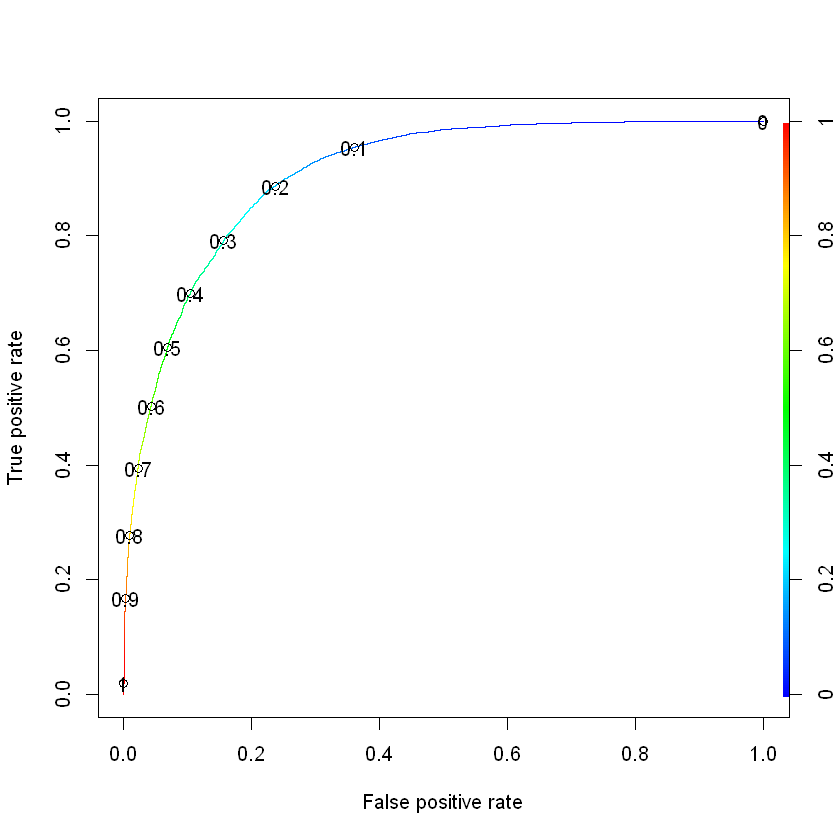

[1] 0.8218421

[1] 26760

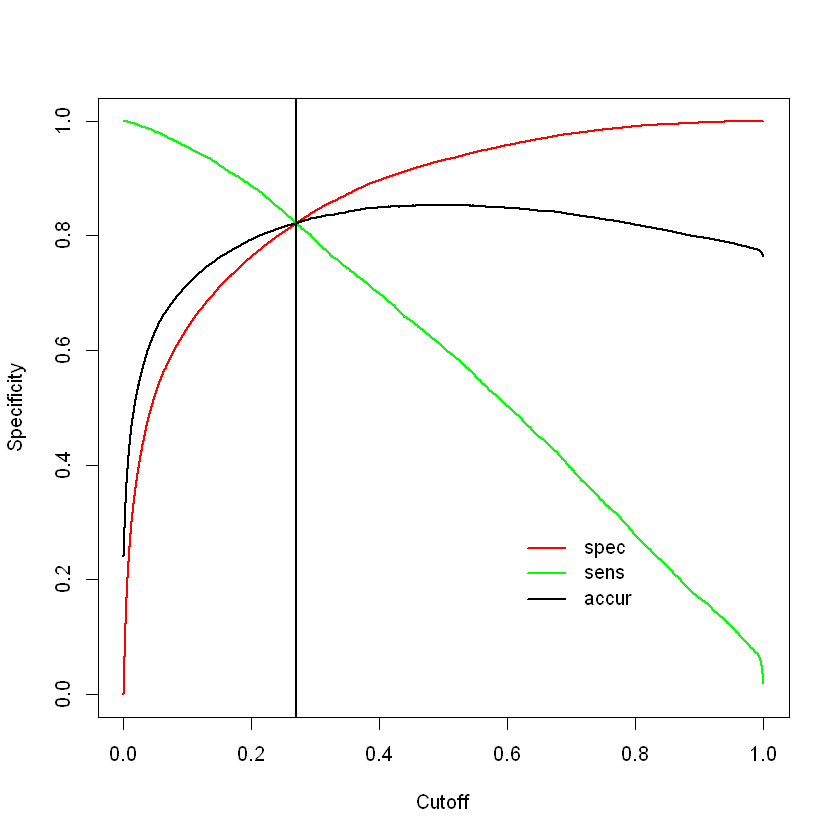

In [1]:
library(ROCR) #пакет для построения ROC-кривых
adult <- read.csv("D:/1_Vladimir_Fuji/Образование/Projects/Tests/adult.csv")

#смотрю структуру данных
str(adult) 
summary(adult)

#строю модель логистической регрессии и смотрю на значимость предикторов
fit  <- glm(income ~ ., adult, family = "binomial")
summary(fit)

#строю альтернативные модели с уменьшением количества предикторов
fit1 = glm(income ~ age + occupation + education + marital.status + relationship + race + sex + native.country + capital.gain + capital.loss + 
             hours.per.week, adult, family = "binomial")
fit2 = glm(income ~ age + education + marital.status + relationship + race + sex + native.country + capital.gain + capital.loss + 
             hours.per.week, adult, family = "binomial")
fit3 = glm(income ~ age + occupation + education + marital.status + relationship + race + sex + capital.gain + capital.loss + 
             hours.per.week, adult, family = "binomial")

#сравниваю альтернативные модели с исходной
anova(fit, fit3, test = 'Chisq')

#добавляю колонку с предсказанием вероятности значений колонки "income"
adult$prob  <- predict(object = fit, type = "response")

#строю ROC - кривую и смотрю на AUC (довольно не плохая)
pred_fit <- prediction(adult$prob, adult$income)
perf_fit <- performance(pred_fit,"tpr","fpr")
plot(perf_fit, colorize=T , print.cutoffs.at = seq(0,1,by=0.1))
auc  <- performance(pred_fit, measure = "auc")
str(auc)

#специфичность (TNR)
perf3  <- performance(pred_fit, x.measure = "cutoff", measure = "spec")
#чувствительность (TPR)
perf4  <- performance(pred_fit, x.measure = "cutoff", measure = "sens")
#точность правильных классификаций
perf5  <- performance(pred_fit, x.measure = "cutoff", measure = "acc")

#строю графики
plot(perf3, col = "red", lwd =2)
plot(add=T, perf4 , col = "green", lwd =2)
plot(add=T, perf5, lwd =2)
legend(x = 0.6,y = 0.3, c("spec", "sens", "accur"), 
       lty = 1, col =c('red', 'green', 'black'), bty = 'n', cex = 1, lwd = 2)

#и подбираю точку пересечения
abline(v= 0.27, lwd = 2)

#добавляю новую переменную с предсказанным значением
adult$pred_resp  <- factor(ifelse(adult$prob > 0.27, 1, 0), labels = c("<=50K", ">50K"))

#сравниваю предсказанное значение с истинным в выборке
adult$correct  <- ifelse(adult$pred_resp == adult$income, 1, 0)

#% правильно предсказанных значений
mean(adult$correct)

#количество правильно предсказанных значение
sum(adult$correct)